In [1]:
import argparse
import pandas as pd
import numpy as np
import os
import sys  
sys.path.insert(0, './MOGDx/MAIN/')
from utils import *
from GNN_MME import *
from train import *
import preprocess_functions

import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold , train_test_split
import networkx as nx
import torch
from datetime import datetime
import joblib
import warnings
import gc
warnings.filterwarnings("ignore")

print("Finished Library Import \n")

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Finished Library Import 



In [2]:
data_input = './data/raw/'
snf_net = 'RPPA_mRNA_graph.graphml'
index_col = 'index'
target = 'paper_BRCA_Subtype_PAM50'

Using cuda device
Total = 6.4Gb 	 Reserved = 0.0Gb 	 Allocated = 0.0Gb
StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
GCN_MME(
  (encoder_dims): ModuleList(
    (0): Encoder(
      (encoder): ModuleList(
        (0): Linear(in_features=464, out_features=500, bias=True)
        (1): Linear(in_features=500, out_features=16, bias=True)
      )
      (norm): ModuleList(
        (0): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (decoder): Sequential(
        (0): Linear(in_features=16, out_features=64, bias=True)
      )
      (drop): Dropout(p=0.5, inplace=False)
    )
    (1): Encoder(
      (encoder): ModuleList(
        (0): Linear(in_features=29995, out_features=500, bias=True)
        (1): Linear(in_features=500, out_features=16, bias=True)
      )
      (norm): ModuleList(
        (0): BatchNorm1d(500, eps=1e-05, momentum=0.1, af

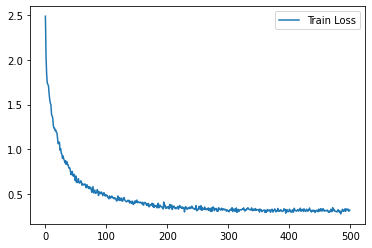

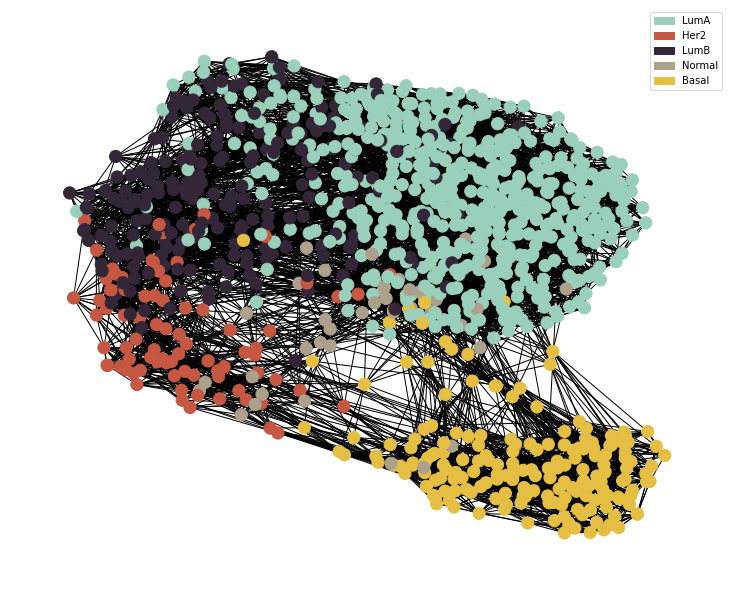

Pretraining | Loss = 0.6359 | Accuracy = 0.7731 
Epoch 00000 | Loss 1.8693 | Train Acc. 0.1802 | 
Epoch 00005 | Loss 0.6202 | Train Acc. 0.8337 | 
Epoch 00010 | Loss 0.5111 | Train Acc. 0.8419 | 
Epoch 00015 | Loss 0.4037 | Train Acc. 0.8686 | 
Epoch 00020 | Loss 0.3962 | Train Acc. 0.8674 | 
Epoch 00025 | Loss 0.3721 | Train Acc. 0.8663 | 
Epoch 00030 | Loss 0.3516 | Train Acc. 0.8884 | 
Epoch 00035 | Loss 0.3659 | Train Acc. 0.8767 | 
Epoch 00040 | Loss 0.3555 | Train Acc. 0.8756 | 
Epoch 00045 | Loss 0.3507 | Train Acc. 0.8779 | 
Epoch 00050 | Loss 0.3288 | Train Acc. 0.8733 | 
Epoch 00055 | Loss 0.3303 | Train Acc. 0.8733 | 
Epoch 00060 | Loss 0.3203 | Train Acc. 0.8849 | 
Epoch 00065 | Loss 0.3178 | Train Acc. 0.8860 | 
Epoch 00070 | Loss 0.3176 | Train Acc. 0.8837 | 
Epoch 00075 | Loss 0.3173 | Train Acc. 0.8779 | 
Epoch 00080 | Loss 0.3167 | Train Acc. 0.9000 | 
Epoch 00085 | Loss 0.3109 | Train Acc. 0.8849 | 
Epoch 00090 | Loss 0.3162 | Train Acc. 0.8930 | 
Epoch 00095 | Loss 0

Epoch 00255 | Loss 0.3873 | Train Acc. 0.8780 | 
Epoch 00260 | Loss 0.3906 | Train Acc. 0.8769 | 
Epoch 00265 | Loss 0.3717 | Train Acc. 0.8920 | 
Epoch 00270 | Loss 0.3690 | Train Acc. 0.8850 | 
Epoch 00275 | Loss 0.3751 | Train Acc. 0.8711 | 
Epoch 00280 | Loss 0.3574 | Train Acc. 0.8990 | 
Epoch 00285 | Loss 0.3611 | Train Acc. 0.8850 | 
Epoch 00290 | Loss 0.4094 | Train Acc. 0.8711 | 
Epoch 00295 | Loss 0.3596 | Train Acc. 0.8931 | 
Epoch 00300 | Loss 0.3686 | Train Acc. 0.8873 | 
Epoch 00305 | Loss 0.3362 | Train Acc. 0.9129 | 
Epoch 00310 | Loss 0.3824 | Train Acc. 0.8955 | 
Epoch 00315 | Loss 0.3700 | Train Acc. 0.8862 | 
Epoch 00320 | Loss 0.3708 | Train Acc. 0.8885 | 
Epoch 00325 | Loss 0.3645 | Train Acc. 0.8885 | 
Epoch 00330 | Loss 0.3472 | Train Acc. 0.8931 | 
Epoch 00335 | Loss 0.3724 | Train Acc. 0.8931 | 
Epoch 00340 | Loss 0.3587 | Train Acc. 0.8920 | 
Epoch 00345 | Loss 0.3447 | Train Acc. 0.8885 | 
Epoch 00350 | Loss 0.3754 | Train Acc. 0.8815 | 
Epoch 00355 | Loss 0

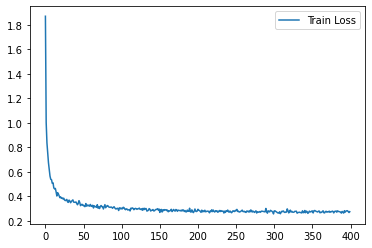

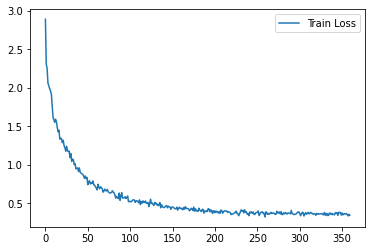

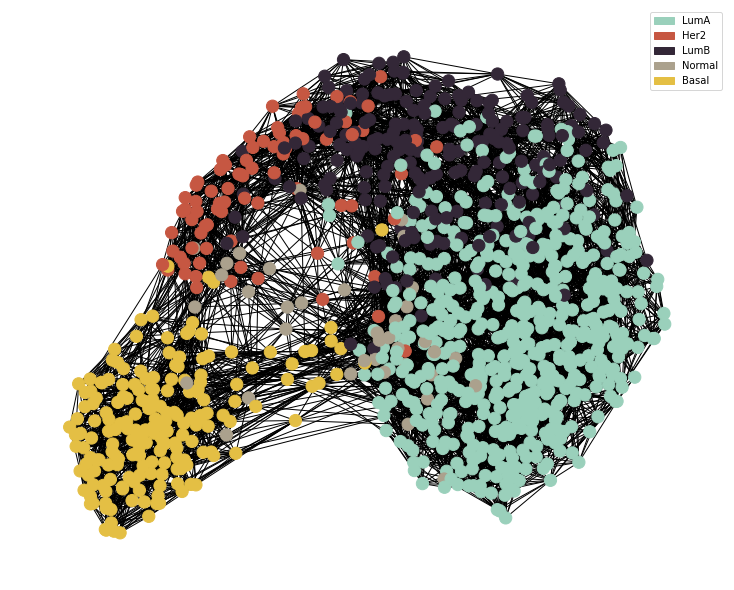

Pretraining | Loss = 0.6711 | Accuracy = 0.8140 
Epoch 00000 | Loss 1.6540 | Train Acc. 0.2462 | 
Epoch 00005 | Loss 0.7255 | Train Acc. 0.8072 | 
Epoch 00010 | Loss 0.6256 | Train Acc. 0.8060 | 
Epoch 00015 | Loss 0.5550 | Train Acc. 0.8490 | 
Epoch 00020 | Loss 0.5057 | Train Acc. 0.8513 | 
Epoch 00025 | Loss 0.4721 | Train Acc. 0.8525 | 
Epoch 00030 | Loss 0.4471 | Train Acc. 0.8444 | 
Epoch 00035 | Loss 0.4198 | Train Acc. 0.8699 | 
Epoch 00040 | Loss 0.4005 | Train Acc. 0.8676 | 
Epoch 00045 | Loss 0.3973 | Train Acc. 0.8734 | 
Epoch 00050 | Loss 0.3910 | Train Acc. 0.8722 | 
Epoch 00055 | Loss 0.3742 | Train Acc. 0.8804 | 
Epoch 00060 | Loss 0.3797 | Train Acc. 0.8606 | 
Epoch 00065 | Loss 0.3741 | Train Acc. 0.8757 | 
Epoch 00070 | Loss 0.3576 | Train Acc. 0.8804 | 
Epoch 00075 | Loss 0.3568 | Train Acc. 0.8757 | 
Epoch 00080 | Loss 0.3579 | Train Acc. 0.8792 | 
Epoch 00085 | Loss 0.3514 | Train Acc. 0.8804 | 
Epoch 00090 | Loss 0.3461 | Train Acc. 0.8780 | 
Epoch 00095 | Loss 0

Epoch 00345 | Loss 0.3092 | Train Acc. 0.9082 | 
Epoch 00350 | Loss 0.3027 | Train Acc. 0.9082 | 
Epoch 00355 | Loss 0.3237 | Train Acc. 0.9024 | 
Epoch 00360 | Loss 0.3081 | Train Acc. 0.9129 | 
Epoch 00365 | Loss 0.3155 | Train Acc. 0.9036 | 
Epoch 00370 | Loss 0.3197 | Train Acc. 0.9106 | 
Epoch 00375 | Loss 0.2960 | Train Acc. 0.9094 | 
Epoch 00380 | Loss 0.3005 | Train Acc. 0.9117 | 
Epoch 00385 | Loss 0.3255 | Train Acc. 0.9059 | 
Epoch 00390 | Loss 0.3438 | Train Acc. 0.8943 | 
Epoch 00395 | Loss 0.3219 | Train Acc. 0.8955 | 
Epoch 00400 | Loss 0.3277 | Train Acc. 0.9001 | 
Epoch 00405 | Loss 0.3295 | Train Acc. 0.8943 | 
Epoch 00410 | Loss 0.3281 | Train Acc. 0.9036 | 
Epoch 00415 | Loss 0.3222 | Train Acc. 0.8920 | 
Epoch 00420 | Loss 0.3025 | Train Acc. 0.9059 | 
Epoch 00425 | Loss 0.3154 | Train Acc. 0.9013 | 
Epoch 00430 | Loss 0.3121 | Train Acc. 0.8978 | 
Epoch 00435 | Loss 0.3242 | Train Acc. 0.8966 | 
Epoch 00440 | Loss 0.2926 | Train Acc. 0.9094 | 
Epoch 00445 | Loss 0

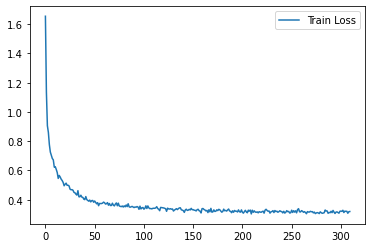

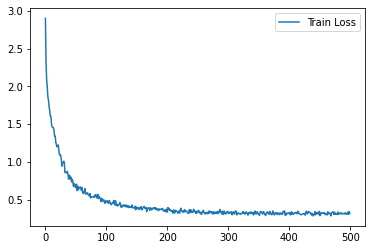

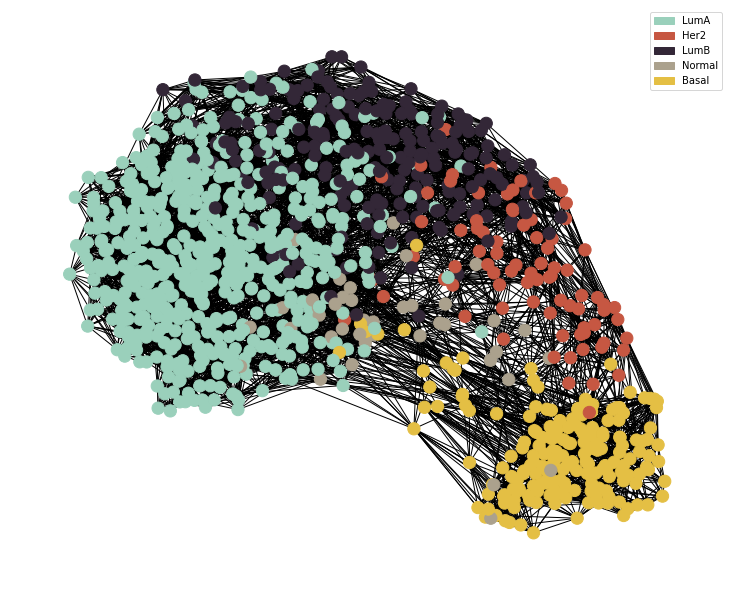

Pretraining | Loss = 0.6109 | Accuracy = 0.7860 
Epoch 00000 | Loss 2.0694 | Train Acc. 0.1417 | 
Epoch 00005 | Loss 0.7488 | Train Acc. 0.7840 | 
Epoch 00010 | Loss 0.5906 | Train Acc. 0.8281 | 
Epoch 00015 | Loss 0.5222 | Train Acc. 0.8351 | 
Epoch 00020 | Loss 0.4856 | Train Acc. 0.8537 | 
Epoch 00025 | Loss 0.4484 | Train Acc. 0.8490 | 
Epoch 00030 | Loss 0.4105 | Train Acc. 0.8722 | 
Epoch 00035 | Loss 0.4123 | Train Acc. 0.8722 | 
Epoch 00040 | Loss 0.3759 | Train Acc. 0.8780 | 
Epoch 00045 | Loss 0.3684 | Train Acc. 0.8792 | 
Epoch 00050 | Loss 0.3737 | Train Acc. 0.8664 | 
Epoch 00055 | Loss 0.3653 | Train Acc. 0.8792 | 
Epoch 00060 | Loss 0.3589 | Train Acc. 0.8722 | 
Epoch 00065 | Loss 0.3578 | Train Acc. 0.8734 | 
Epoch 00070 | Loss 0.3556 | Train Acc. 0.8943 | 
Epoch 00075 | Loss 0.3583 | Train Acc. 0.8780 | 
Epoch 00080 | Loss 0.3534 | Train Acc. 0.8839 | 
Epoch 00085 | Loss 0.3415 | Train Acc. 0.8839 | 
Epoch 00090 | Loss 0.3462 | Train Acc. 0.8862 | 
Epoch 00095 | Loss 0

Epoch 00260 | Loss 0.3665 | Train Acc. 0.8931 | 
Epoch 00265 | Loss 0.3700 | Train Acc. 0.8757 | 
Epoch 00270 | Loss 0.3767 | Train Acc. 0.8873 | 
Epoch 00275 | Loss 0.3720 | Train Acc. 0.8757 | 
Epoch 00280 | Loss 0.3571 | Train Acc. 0.8943 | 
Epoch 00285 | Loss 0.3673 | Train Acc. 0.8966 | 
Epoch 00290 | Loss 0.3803 | Train Acc. 0.8920 | 
Epoch 00295 | Loss 0.3512 | Train Acc. 0.8966 | 
Epoch 00300 | Loss 0.3519 | Train Acc. 0.8920 | 
Epoch 00305 | Loss 0.3707 | Train Acc. 0.8792 | 
Epoch 00310 | Loss 0.3542 | Train Acc. 0.9048 | 
Epoch 00315 | Loss 0.3491 | Train Acc. 0.8908 | 
Epoch 00320 | Loss 0.3588 | Train Acc. 0.8792 | 
Epoch 00325 | Loss 0.3600 | Train Acc. 0.8862 | 
Epoch 00330 | Loss 0.3637 | Train Acc. 0.9024 | 
Epoch 00335 | Loss 0.3446 | Train Acc. 0.9048 | 
Epoch 00340 | Loss 0.3203 | Train Acc. 0.9117 | 
Epoch 00345 | Loss 0.3444 | Train Acc. 0.8990 | 
Epoch 00350 | Loss 0.3398 | Train Acc. 0.8873 | 
Epoch 00355 | Loss 0.3559 | Train Acc. 0.8908 | 
Epoch 00360 | Loss 0

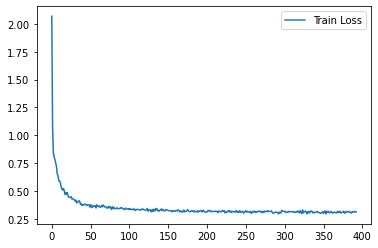

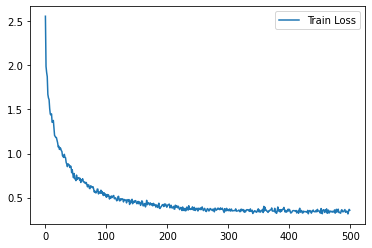

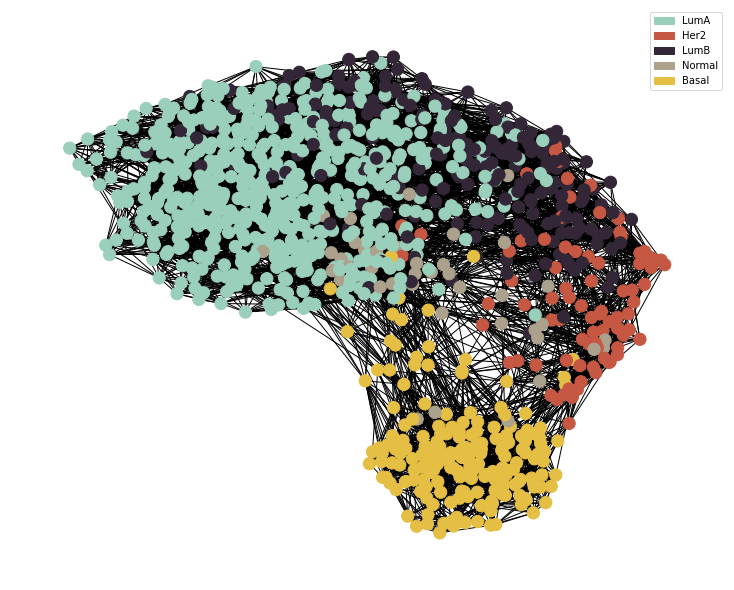

Pretraining | Loss = 0.4186 | Accuracy = 0.8372 
Epoch 00000 | Loss 1.8770 | Train Acc. 0.2462 | 
Epoch 00005 | Loss 0.8384 | Train Acc. 0.7189 | 
Epoch 00010 | Loss 0.6598 | Train Acc. 0.7956 | 
Epoch 00015 | Loss 0.5600 | Train Acc. 0.8281 | 
Epoch 00020 | Loss 0.5172 | Train Acc. 0.8374 | 
Epoch 00025 | Loss 0.5242 | Train Acc. 0.8316 | 
Epoch 00030 | Loss 0.4575 | Train Acc. 0.8525 | 
Epoch 00035 | Loss 0.4486 | Train Acc. 0.8502 | 
Epoch 00040 | Loss 0.4358 | Train Acc. 0.8595 | 
Epoch 00045 | Loss 0.4307 | Train Acc. 0.8595 | 
Epoch 00050 | Loss 0.4185 | Train Acc. 0.8606 | 
Epoch 00055 | Loss 0.4092 | Train Acc. 0.8571 | 
Epoch 00060 | Loss 0.3917 | Train Acc. 0.8711 | 
Epoch 00065 | Loss 0.3961 | Train Acc. 0.8583 | 
Epoch 00070 | Loss 0.3895 | Train Acc. 0.8664 | 
Epoch 00075 | Loss 0.3765 | Train Acc. 0.8676 | 
Epoch 00080 | Loss 0.3746 | Train Acc. 0.8653 | 
Epoch 00085 | Loss 0.3827 | Train Acc. 0.8688 | 
Epoch 00090 | Loss 0.3607 | Train Acc. 0.8757 | 
Epoch 00095 | Loss 0

Epoch 00310 | Loss 0.3715 | Train Acc. 0.8885 | 
Epoch 00315 | Loss 0.3720 | Train Acc. 0.8850 | 
Epoch 00320 | Loss 0.3966 | Train Acc. 0.8804 | 
Epoch 00325 | Loss 0.3827 | Train Acc. 0.8792 | 
Epoch 00330 | Loss 0.3801 | Train Acc. 0.8815 | 
Epoch 00335 | Loss 0.4113 | Train Acc. 0.8792 | 
Epoch 00340 | Loss 0.3681 | Train Acc. 0.8734 | 
Epoch 00345 | Loss 0.3942 | Train Acc. 0.8711 | 
Epoch 00350 | Loss 0.4043 | Train Acc. 0.8722 | 
Epoch 00355 | Loss 0.3787 | Train Acc. 0.8839 | 
Epoch 00360 | Loss 0.4016 | Train Acc. 0.8769 | 
Epoch 00365 | Loss 0.3777 | Train Acc. 0.8873 | 
Epoch 00370 | Loss 0.3856 | Train Acc. 0.8780 | 
Epoch 00375 | Loss 0.4034 | Train Acc. 0.8711 | 
Epoch 00380 | Loss 0.3920 | Train Acc. 0.8792 | 
Epoch 00385 | Loss 0.3790 | Train Acc. 0.8780 | 
Epoch 00390 | Loss 0.3604 | Train Acc. 0.8792 | 
Epoch 00395 | Loss 0.3678 | Train Acc. 0.8885 | 
Epoch 00400 | Loss 0.3658 | Train Acc. 0.8955 | 
Epoch 00405 | Loss 0.3888 | Train Acc. 0.8885 | 
Epoch 00410 | Loss 0

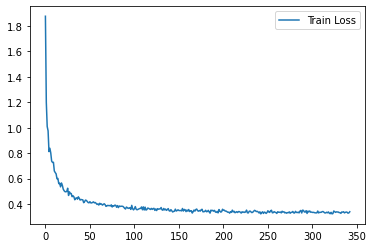

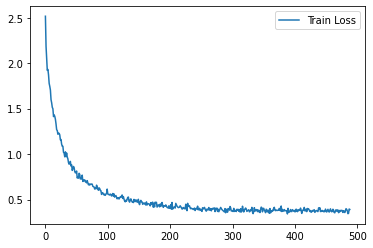

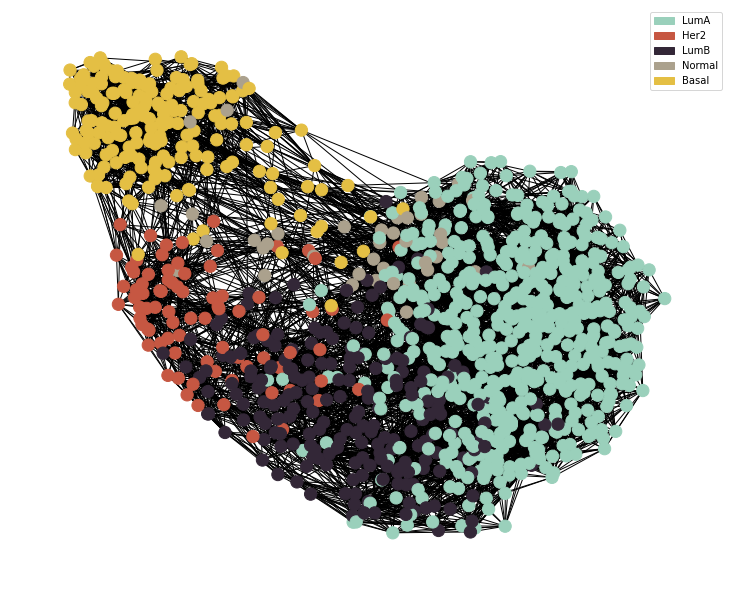

Pretraining | Loss = 0.5111 | Accuracy = 0.8512 
Epoch 00000 | Loss 1.6888 | Train Acc. 0.2451 | 
Epoch 00005 | Loss 0.6929 | Train Acc. 0.7921 | 
Epoch 00010 | Loss 0.5924 | Train Acc. 0.8339 | 
Epoch 00015 | Loss 0.4995 | Train Acc. 0.8502 | 
Epoch 00020 | Loss 0.4743 | Train Acc. 0.8571 | 
Epoch 00025 | Loss 0.4338 | Train Acc. 0.8606 | 
Epoch 00030 | Loss 0.4123 | Train Acc. 0.8560 | 
Epoch 00035 | Loss 0.4098 | Train Acc. 0.8583 | 
Epoch 00040 | Loss 0.3890 | Train Acc. 0.8676 | 
Epoch 00045 | Loss 0.3730 | Train Acc. 0.8711 | 
Epoch 00050 | Loss 0.3789 | Train Acc. 0.8757 | 
Epoch 00055 | Loss 0.3809 | Train Acc. 0.8676 | 
Epoch 00060 | Loss 0.3667 | Train Acc. 0.8734 | 
Epoch 00065 | Loss 0.3662 | Train Acc. 0.8606 | 
Epoch 00070 | Loss 0.3453 | Train Acc. 0.8606 | 
Epoch 00075 | Loss 0.3707 | Train Acc. 0.8746 | 
Epoch 00080 | Loss 0.3657 | Train Acc. 0.8606 | 
Epoch 00085 | Loss 0.3677 | Train Acc. 0.8641 | 
Epoch 00090 | Loss 0.3470 | Train Acc. 0.8688 | 
Epoch 00095 | Loss 0

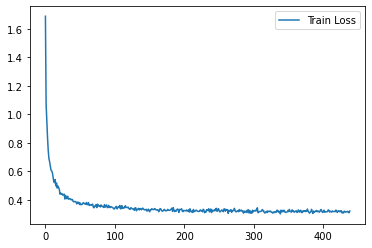

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')# Get GPU device name, else use CPU
print("Using %s device" % device)
get_gpu_memory()

datModalities , meta = data_parsing(data_input , ['RPPA', 'mRNA'] , target , index_col)

graph_file = data_input + '../Networks/' + snf_net
g = nx.read_graphml(graph_file)

meta = meta.loc[sorted(meta.index)]
label = F.one_hot(torch.Tensor(list(meta.astype('category').cat.codes)).to(torch.int64))

skf = StratifiedKFold(n_splits=5 , shuffle=True) 

print(skf)

MME_input_shapes = [ datModalities[mod].shape[1] for mod in datModalities]

h = reduce(merge_dfs , list(datModalities.values()))
h = h.loc[sorted(h.index)]

del datModalities
gc.collect()

output_metrics = []
test_logits = []
test_labels = []

for i, (train_index, test_index) in enumerate(skf.split(meta.index, meta)) :
    
    model = GCN_MME(MME_input_shapes , [16 , 16] , 64 , [32]  , len(meta.unique())).to(device)
    g = dgl.graph(([], []) , num_nodes=len(meta))
    g = dgl.add_self_loop(g)
    g.ndata['feat'] = torch.Tensor(h.to_numpy())
    g.ndata['label'] = label
    g = g.to(device)
    
    print(model)
    print(g)

    G = train(g, train_index, device ,  model , meta , 500 , 1e-3 , 20, pretrain=True)
    
    sampler = NeighborSampler(
        [15 for i in range(len(model.gnnlayers))],  # fanout for each layer
        prefetch_node_feats=['feat'],
        prefetch_labels=['label'],
    )
    test_dataloader = DataLoader(
        g,
        torch.Tensor(test_index).to(torch.int64).to(device),
        sampler,
        device=device,
        batch_size=1024,
        shuffle=True,
        drop_last=False,
        num_workers=0,
        use_uva=False,
    )
    
    test_output_metrics = evaluate(model , g, test_dataloader)
    
    print(
        "Pretraining | Loss = {:.4f} | Accuracy = {:.4f} ".format(
         test_output_metrics[0] , test_output_metrics[1] )
    )
    
    with torch.no_grad():
        torch.cuda.empty_cache()
    gc.collect()

    model = model.apply(init_weights)

    g = dgl.from_networkx(G , node_attrs=['idx' , 'label'])
    g.ndata['feat'] = torch.Tensor(h.to_numpy())
    g.ndata['label'] = label
    g = g.to(device)
    
    print(g)
    
    loss_plot = train(g, train_index, device ,  model , meta , 2000 , 1e-3 , 100)
    
    sampler = NeighborSampler(
        [15 for i in range(len(model.gnnlayers))],  # fanout for each layer
        prefetch_node_feats=['feat'],
        prefetch_labels=['label'],
    )
    test_dataloader = DataLoader(
        g,
        torch.Tensor(test_index).to(torch.int64).to(device),
        sampler,
        device=device,
        batch_size=1024,
        shuffle=True,
        drop_last=False,
        num_workers=0,
        use_uva=False,
    )
    
    test_output_metrics = evaluate(model , g, test_dataloader)

    print(
        "Fold : {:01d} | Test Accuracy = {:.4f} | F1 = {:.4f} ".format(
        i+1 , test_output_metrics[1] , test_output_metrics[2] )
    )
    
    test_logits.extend(test_output_metrics[-2])
    test_labels.extend(test_output_metrics[-1])
    
    output_metrics.append(test_output_metrics)
    if i == 0 : 
        best_model = model
        best_idx = i
    elif output_metrics[best_idx][1] < test_output_metrics[1] : 
        best_model = model
        best_idx   = i

    get_gpu_memory()
    del model
    gc.collect()
    torch.cuda.empty_cache()
    print('Clearing gpu memory')
    get_gpu_memory()

test_logits = torch.stack(test_logits)
test_labels = torch.stack(test_labels)

5 Fold Cross Validation Accuracy = 83.56 ± 3.03
5 Fold Cross Validation F1 = 80.78 ± 2.92


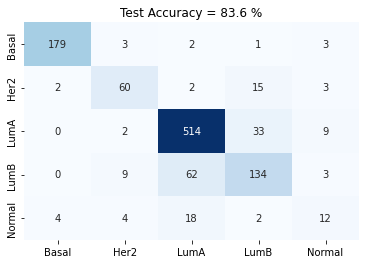

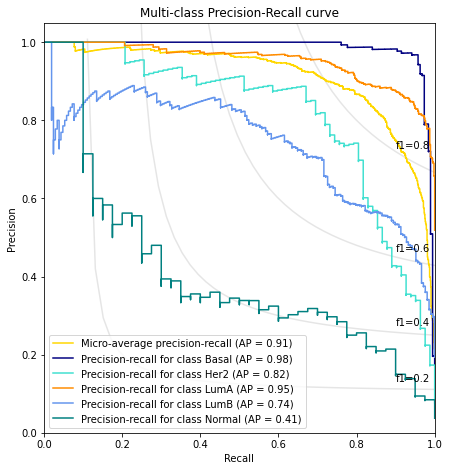

In [5]:
accuracy = []
F1 = []
i = 0
for metric in output_metrics :
    
    accuracy.append(metric[1])
    F1.append(metric[2])


print("%i Fold Cross Validation Accuracy = %2.2f \u00B1 %2.2f" %(5 , np.mean(accuracy)*100 , np.std(accuracy)*100))
print("%i Fold Cross Validation F1 = %2.2f \u00B1 %2.2f" %(5 , np.mean(F1)*100 , np.std(F1)*100))

confusion_matrix(test_logits , test_labels , meta.astype('category').cat.categories)
plt.title('Test Accuracy = %2.1f %%' % (np.mean(accuracy)*100))

precision_recall_plot , all_predictions_conf = AUROC(test_logits, test_labels , meta)

node_predictions = []
node_true        = []
display_label = meta.astype('category').cat.categories
for pred , true in zip(all_predictions_conf.argmax(1) , list(test_labels.detach().cpu().argmax(1).numpy()))  : 
    node_predictions.append(display_label[pred])
    node_true.append(display_label[true])

tst = pd.DataFrame({'Actual' : node_true , 'Predicted' : node_predictions})